In [ ]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn.model_selection as mod
import sklearn.neighbors as nei
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, precision_recall_curve, average_precision_score 
from sklearn.naive_bayes import MultinomialNB
#from sklearn.cross_validation import cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
#import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import operator
sns.set(color_codes=True)

%matplotlib inline

In [3]:
data= pd.read_csv("diabetes.csv")

In [4]:
# Check dimension of the DataFrame
data.shape

(768, 9)

In [5]:
#check first five rows
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#Check Null Values
data.isnull().values.any()

False

In [7]:
# Check missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
#Description of the data set
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
#Check Nutritional status check
Nutritional_status= pd.Series([])

<ipython-input-9-c27e338c4a99>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Nutritional_status= pd.Series([])


In [10]:
#Nutritional Status Based on BMI

for i in range(len(data)): 
    if data['BMI'][i] == 0.0: 
        Nutritional_status[i]="NA"
    
    elif data['BMI'][i] < 18.5: 
        Nutritional_status[i]="Underweight"
        
    elif data['BMI'][i] < 25: 
        Nutritional_status[i]="Normal"
  
    elif data['BMI'][i] >= 25 and data['BMI'][i] < 30: 
        Nutritional_status[i]="Overweight"
  
    elif data['BMI'][i] >= 30: 
        Nutritional_status[i]="Obese"
        
    else: 
        Nutritional_status[i]= data['BMI'][i]

In [11]:
# Insert new column - Nutritional Status
data.insert(6, "Nutritional Status", Nutritional_status)

In [12]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,Obese,0.627,50,1
1,1,85,66,29,0,26.6,Overweight,0.351,31,0
2,8,183,64,0,0,23.3,Normal,0.672,32,1
3,1,89,66,23,94,28.1,Overweight,0.167,21,0
4,0,137,40,35,168,43.1,Obese,2.288,33,1
5,5,116,74,0,0,25.6,Overweight,0.201,30,0
6,3,78,50,32,88,31.0,Obese,0.248,26,1
7,10,115,0,0,0,35.3,Obese,0.134,29,0
8,2,197,70,45,543,30.5,Obese,0.158,53,1
9,8,125,96,0,0,0.0,NA,0.232,54,1


In [13]:
data['Nutritional Status'].value_counts()

Obese          472
Overweight     179
Normal         102
NA              11
Underweight      4
Name: Nutritional Status, dtype: int64

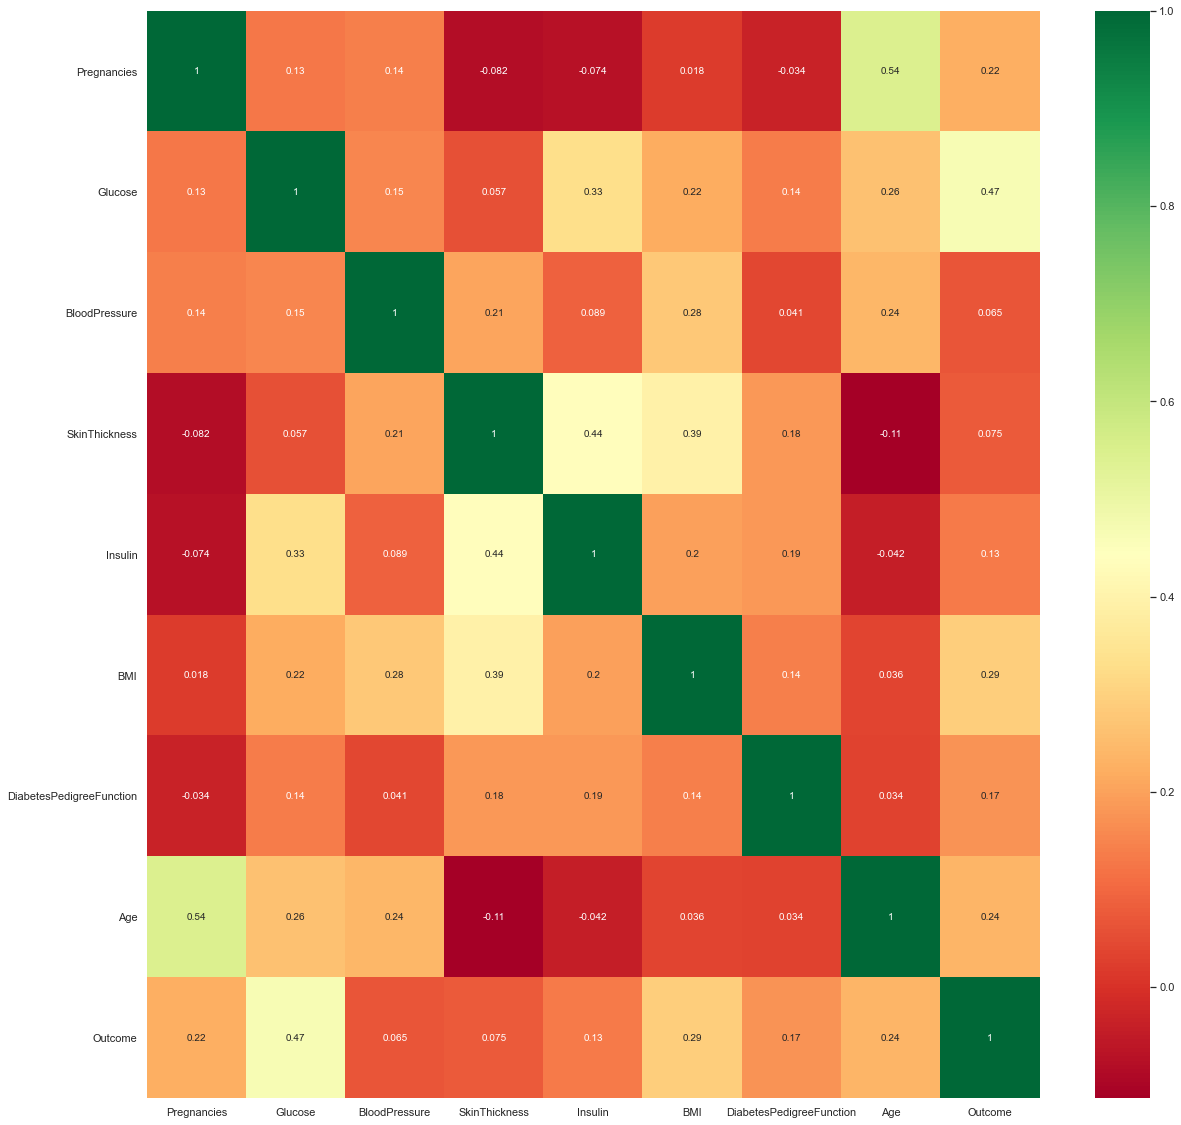

In [14]:
## Check out the Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [15]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


#Changing the diabetes column data from boolean to number

In [64]:
diabetes_true_count = len(data.loc[data['Outcome'] == True])
diabetes_false_count = len(data.loc[data['Outcome'] == False])

In [57]:
(diabetes_true_count,diabetes_false_count)

(268, 500)

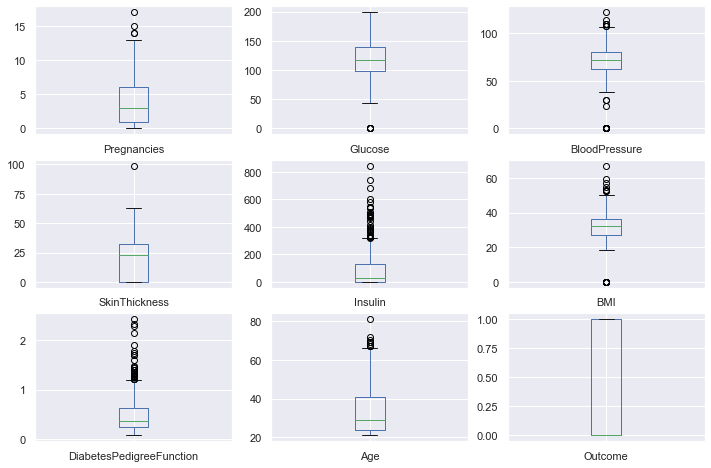

In [58]:
#Boxplot of each column
data.plot(kind='box', figsize=(12, 8), subplots=True, layout=(3, 3))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00D26E38>,
      dtype=object)

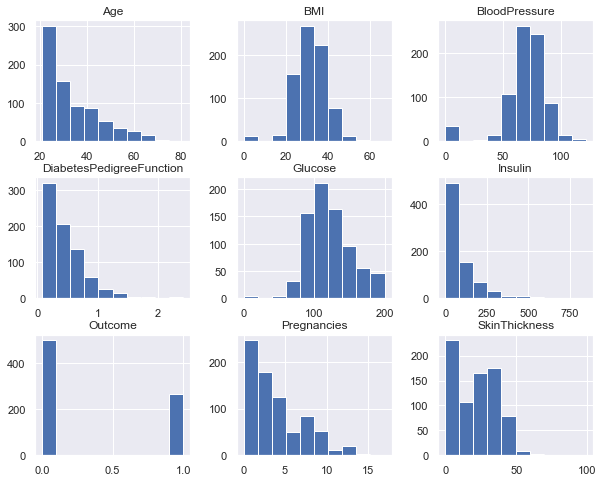

In [59]:
#Let's do some data visualization and plot histogram

data.hist(figsize=(10,8))

11 women don't have information about BMI. Only 106 of 758 women have normal weight. Most of the women present overweight or obesity.¶

In [60]:
# Create OGTT_Interpretation (Interpretation of Glucose level) column 

OGTT_Interpretation = pd.Series([])

<ipython-input-60-31f47e52ed54>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  OGTT_Interpretation = pd.Series([])


In [61]:
for i in range(len(data)): 
    if data['Glucose'][i] == 0.0: 
        OGTT_Interpretation [i]="NA"
    
    elif data['Glucose'][i] <= 140: 
        OGTT_Interpretation [i]="Normal"
    
    elif data['Glucose'][i] > 140 & data['Glucose'][i] <= 198: 
        OGTT_Interpretation [i]="Impaired Glucose Tolerance"
        
    elif data['Glucose'][i] > 198: 
        OGTT_Interpretation[i]="Diabetic Level"
        
    else: 
        OGTT_Interpretation [i]= data['Glucose'][i]

In [65]:
# Insert new column - Glucose Result
data.insert(2, "Glucose Result", OGTT_Interpretation)

ValueError: cannot insert Glucose Result, already exists

In [66]:
data['Glucose Result'].value_counts()

Normal                        571
Impaired Glucose Tolerance    192
NA                              5
Name: Glucose Result, dtype: int64

Not a single individual from the sample showed OGTT result at "Diabetic levels"

In [67]:
data.head(5)

,Pregnancies,Glucose,Glucose Result,BloodPressure,Percentile skin thickness,SkinThickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
0,6,148,Impaired Glucose Tolerance,72,17 P90th - P95th,35,0,33.6,Obese,0.627,50,1
1,1,85,Normal,66,12 P75th,29,0,26.6,Overweight,0.351,31,0
2,8,183,Impaired Glucose Tolerance,64,0 NA,0,0,23.3,Normal,0.672,32,1
3,1,89,Normal,66,9 P25th - P50th,23,94,28.1,Overweight,0.167,21,0
4,0,137,Normal,40,17 P90th - P95th,35,168,43.1,Obese,2.288,33,1


In [63]:
Impaired_Glucose_Tolerance_Diabetic = ((data ['Glucose'] > 140 ) & (data ['Glucose'] <= 198) & (data ['Outcome'] == 1)).sum()
Impaired_Glucose_Tolerance_Diabetic

131

# Not every women with impaired glucose tolerance have diabetes. That can show that the ones with impaired glucose tolerance might be in risk of developing diabetes or are diabetic, but not already diagnosed.¶


In [35]:
Normal_Glucose_Diabetic = ((data ['Glucose'] != 0 ) & (data ['Glucose'] <= 140) & (data ['Outcome'] == 1)).sum()
Normal_Glucose_Diabetic

134

# Half of the diabetic women showed normal glucose level. Information regarding drug therapy is needed

In [36]:
# Create Percentile of skin thickness column

Percentile_skin_thickness = pd.Series([])

<ipython-input-36-de13583705ab>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Percentile_skin_thickness = pd.Series([])


In [38]:
# Check how many women are 80 or older (the Percentile skin thickeness depend of skin fold and age)

data['Age'].value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
32    16
36    16
38    16
45    15
34    14
40    13
43    13
46    13
39    12
35    10
50     8
44     8
51     8
52     8
58     7
47     6
54     6
57     5
60     5
48     5
49     5
53     5
55     4
62     4
63     4
66     4
56     3
59     3
65     3
67     3
61     2
69     2
72     1
64     1
68     1
70     1
81     1
Name: Age, dtype: int64

In [41]:
#  Check skin fold thickness Percentile
for i in range(len(data)): 
    
    
    if data["Age"][i] >= 20.0 and data["Age"][i] <= 79.0: 
        
        if data["SkinThickness"][i] == 0.0: 
            Percentile_skin_thickness[i]=" 0 NA"
    
        elif data["SkinThickness"][i] < 11.9: 
            Percentile_skin_thickness[i]="1 <P5th"
        
        elif data["SkinThickness"][i] == 11.9: 
            Percentile_skin_thickness[i]="2 P5th"
        
        elif data["SkinThickness"][i] > 11.9 and data["SkinThickness"][i] < 14.0: 
            Percentile_skin_thickness[i]="3 P5th - P10th"
        
        elif data["SkinThickness"][i] == 14.0: 
            Percentile_skin_thickness[i]="4 P10th"
        
        elif data["SkinThickness"][i] > 14.0 and  data["SkinThickness"][i] < 15.8: 
            Percentile_skin_thickness[i]="5 P10th - P15th"
        
        elif data["SkinThickness"][i] == 15.8: 
            Percentile_skin_thickness[i]="6 P15th"
        
        elif data["SkinThickness"][i] > 15.8 and data["SkinThickness"][i] < 18.0: 
            Percentile_skin_thickness[i]="7 P15th - P25th"
    
        elif data["SkinThickness"][i] == 18.0: 
            Percentile_skin_thickness[i]="8 P25th"
        
        elif data["SkinThickness"][i] > 18.0 and data["SkinThickness"][i] < 23.5: 
            Percentile_skin_thickness[i]="9 P25th - P50th"
   
        elif data["SkinThickness"][i] == 23.5: 
            Percentile_skin_thickness[i]="10 P50th"
        
        elif data["SkinThickness"][i] > 23.5 and data["SkinThickness"][i] < 29.0: 
            Percentile_skin_thickness[i]="11 P50th - P75th"
        
        elif data["SkinThickness"][i] == 29.0: 
            Percentile_skin_thickness[i]="12 P75th"
        
        elif data["SkinThickness"][i] > 29.0 and data["SkinThickness"][i] < 31.9: 
            Percentile_skin_thickness[i]="13 P75th - P85th"
        
        elif data["SkinThickness"][i] == 31.9: 
            Percentile_skin_thickness[i]="14 P85th"
        
        elif data["SkinThickness"][i] > 31.9 and data["SkinThickness"][i] < 33.7: 
            Percentile_skin_thickness[i]="15 P85th - P90th"
    
        elif data["SkinThickness"][i] == 33.7: 
            Percentile_skin_thickness[i]="16 P90th"
            
        elif data["SkinThickness"][i] > 33.7 and data["SkinThickness"][i] < 35.9: 
            Percentile_skin_thickness[i]="17 P90th - P95th"
    
        elif data["SkinThickness"][i] == 35.9: 
            Percentile_skin_thickness[i]="18 P95th"
        
        elif data["SkinThickness"][i] > 35.9: 
            Percentile_skin_thickness[i]="19 >P95th"
            
    elif data["Age"][i] >= 80.0:  #Only 1 woman is 81 years old
        if  data["SkinThickness"][i] > 31.7: 
            Percentile_skin_thickness[i]="20 >P95th"

In [43]:
# Insert new column - Percentile of skin thickness

data.insert(4, "Percentile skin thickness", Percentile_skin_thickness)

In [44]:
# Check the first 5 rows

data.head(5)

,Pregnancies,Glucose,Glucose Result,BloodPressure,Percentile skin thickness,SkinThickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
0,6,148,Impaired Glucose Tolerance,72,17 P90th - P95th,35,0,33.6,Obese,0.627,50,1
1,1,85,Normal,66,12 P75th,29,0,26.6,Overweight,0.351,31,0
2,8,183,Impaired Glucose Tolerance,64,0 NA,0,0,23.3,Normal,0.672,32,1
3,1,89,Normal,66,9 P25th - P50th,23,94,28.1,Overweight,0.167,21,0
4,0,137,Normal,40,17 P90th - P95th,35,168,43.1,Obese,2.288,33,1


It looks like the Percentile of the triceps skin fold thickness can predict the Nutritional Status

In [45]:
# Check number of women x Percentile of skin thickness

data['Percentile skin thickness'].value_counts()

 0 NA               227
19 >P95th           145
11 P50th - P75th     87
9 P25th - P50th      79
15 P85th - P90th     50
13 P75th - P85th     46
17 P90th - P95th     23
7 P15th - P25th      20
8 P25th              20
3 P5th - P10th       18
12 P75th             17
1 <P5th              15
5 P10th - P15th      14
4 P10th               6
20 >P95th             1
Name: Percentile skin thickness, dtype: int64

227 women don't have information regarding skin fold. Most of the sample have Percentile of skin thickness greater than 95th. 53 women had value below P15 indicating that they might be malnourished. Only one woman is 80 years old or older and she presents a Percentile of skin thickness greater than 95th

In [46]:
diabetic_malnourished_st = ((data ['SkinThickness'] < 15.8) & (data ['Outcome'] == 1)).sum()
diabetic_malnourished_st

94

In [47]:
diabetic_malnourished_bmi = ((data ['BMI'] < 18.5) & (data ['Outcome'] == 1)).sum()
diabetic_malnourished_bmi

2

In [48]:
diabetic_malnourished_bmi_st = ((data ['BMI'] < 18.5) & (data ['SkinThickness'] < 15.8) & (data ['Outcome'] == 1)).sum()
diabetic_malnourished_bmi_st

2

Interesting to note that 94 diabetic women were classified as underweight/malnourished based only on Skin thickness, but only 2 diabetic women presented underweight/malnutrition when considering BMI or BMI & Skin Thickness. Skinfold thicknesses are difficult measurements to make with precision and accuracy without rigorous training, for that reason they are rarely used today and not universally applicable. Besides, skinfold thickness can be problematic to identify malnutrition in many individuals as they vary with diseases such as diabetes, menopause, and hydrational status. That way, more data should be included in this dataset to help to identify malnutrition using skinfold thickness measurement

In [49]:
data.min()

Pregnancies                                           0
Glucose                                               0
Glucose Result               Impaired Glucose Tolerance
BloodPressure                                         0
Percentile skin thickness                          0 NA
SkinThickness                                         0
Insulin                                               0
BMI                                                   0
Nutritional Status                                   NA
DiabetesPedigreeFunction                          0.078
Age                                                  21
Outcome                                               0
dtype: object

It can be seem that only adult women were included as the minimum age is 21 years old. It can be noticed that a number of women don't have information of some of the attributes, such as glucose, blood pressure, etc as the minimum value is zero

In [50]:
data.max()

Pregnancies                               17
Glucose                                  199
Glucose Result                        Normal
BloodPressure                            122
Percentile skin thickness    9 P25th - P50th
SkinThickness                             99
Insulin                                  846
BMI                                     67.1
Nutritional Status               Underweight
DiabetesPedigreeFunction                2.42
Age                                       81
Outcome                                    1
dtype: object

The nutritional status 'underweight' should not be classified as Max Value in medical point of view. However, it was considered as a Max value as it starts with the letter U

In [51]:
#Check if the sample were classified as Underweight presented a BMI lower than 18.5

pima_underweight = data[data['Nutritional Status'] =='Underweight']
pima_underweight

,Pregnancies,Glucose,Glucose Result,BloodPressure,Percentile skin thickness,SkinThickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
239,0,104,Normal,76,0 NA,0,0,18.4,Underweight,0.582,27,0
418,1,83,Normal,68,0 NA,0,0,18.2,Underweight,0.624,27,0
438,1,97,Normal,70,5 P10th - P15th,15,0,18.2,Underweight,0.147,21,0
526,1,97,Normal,64,9 P25th - P50th,19,82,18.2,Underweight,0.299,21,0


In [52]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

500 not diabetic and 268 are diabetic

In [53]:
# Another way of counting the outcome (diabetes)
count_not_diabetic = len(data[data['Outcome']==0])
count_not_diabetic

500

In [54]:
# Check the average of features grouped by Outcome (Diabetes)

data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


It looks like the average of all features is higher in diabetic women.

In [55]:
data.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64